# Question 1


## 1. Importing Libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

## 2. Data Preparation


In [2]:
df = pd.read_csv('/content/crime_dataset_bengaluru.csv')
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df

,Date,Location,Crime Count in thousands
0,2022-12-04,Indiranagar,14.342
1,2022-12-11,Indiranagar,19.282
2,2022-12-18,Indiranagar,19.354
3,2022-12-25,Indiranagar,17.801
4,2023-01-01,Indiranagar,13.606
...,...,...,...
195,2024-09-29,MG Road,6.654
196,2024-10-06,MG Road,16.167
197,2024-10-13,MG Road,12.593
198,2024-10-20,MG Road,12.433


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      200 non-null    datetime64[ns]
 1   Location                  200 non-null    object        
 2   Crime Count in thousands  200 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB


In [4]:
df.head(10)

,Date,Location,Crime Count in thousands
0,2022-12-04,Indiranagar,14.342
1,2022-12-11,Indiranagar,19.282
2,2022-12-18,Indiranagar,19.354
3,2022-12-25,Indiranagar,17.801
4,2023-01-01,Indiranagar,13.606
5,2023-01-08,Indiranagar,5.642
6,2023-01-15,Indiranagar,15.198
7,2023-01-22,Indiranagar,6.181
8,2023-01-29,Indiranagar,8.808
9,2023-02-05,Indiranagar,7.932


## 3. Grouping Data By Location

In [5]:
location_groups = df.groupby('Location')

In [6]:
df_list = list()
for location_code, group in location_groups:
  df_list.append(group)
df_I = (df_list[0].set_index("Date")).drop(columns=['Location'])
df_M = (df_list[1].set_index("Date")).drop(columns=['Location'])

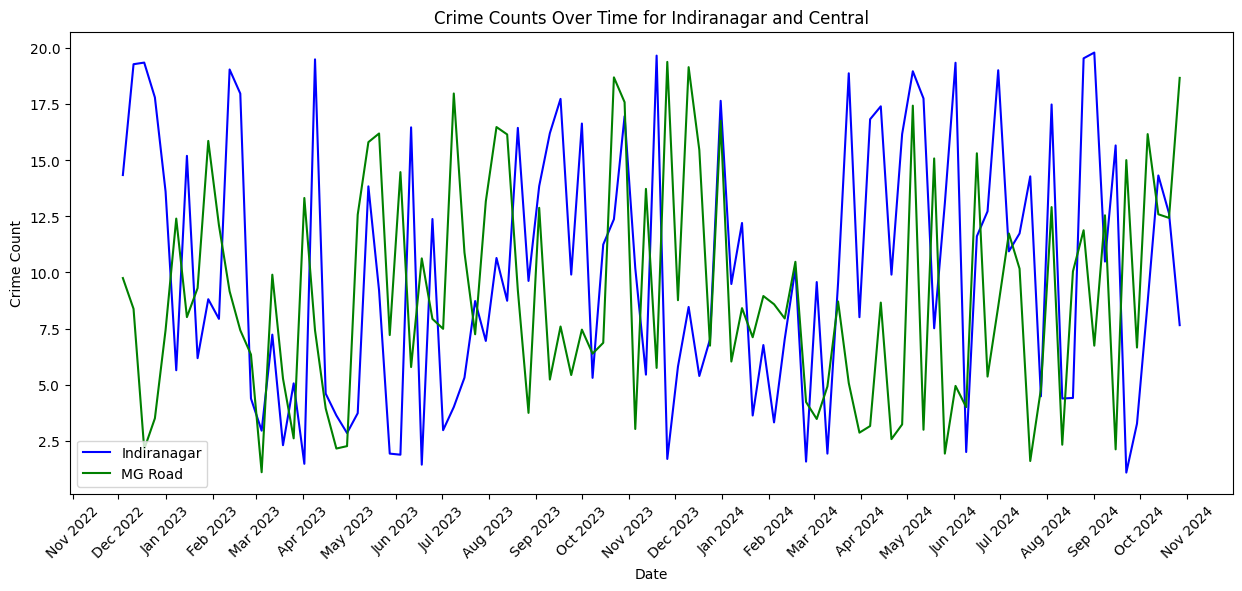

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(df_I.index, df_I["Crime Count in thousands"], label="Indiranagar", color="blue")
plt.plot(df_M.index, df_M["Crime Count in thousands"], label="MG Road", color="green")
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.title("Crime Counts Over Time for Indiranagar and Central")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.legend()
plt.xticks(rotation=45)
plt.show()

## 4. Performing AR and ARIMA

In [8]:
def fit_ar(df):
    train = df.reset_index(drop=True)
    ar_model = AutoReg(train['Crime Count in thousands'], lags=20).fit()
    ar_pred = ar_model.predict(start=20, end=len(df)-1, dynamic=False)
    ar_rmse = mean_squared_error(train['Crime Count in thousands'][20:], ar_pred)
    ar_future = ar_model.predict(start=len(train),end=(len(train)+7))
    return ar_pred, ar_rmse, ar_future

def fit_arima(df):
    train = df
    arima_model = ARIMA(train['Crime Count in thousands'], order=(20, 1, 20)).fit()
    arima_pred = arima_model.forecast(steps=len(df))
    arima_rmse = mean_squared_error(train['Crime Count in thousands'], arima_pred)
    arima_future = arima_model.forecast(steps=8)
    return arima_pred, arima_rmse, arima_future

In [10]:
ar_pred_I, ar_rmse_I, ar_future_I = fit_ar(df_I)
arima_pred_I, arima_rmse_I, arima_future_I = fit_arima(df_I)
ar_future_I.index = arima_future_I.index
print(f"AR Model RMSE (Indiranagar): {ar_rmse_I}")
print(f"ARIMA Model RMSE (Indiranagar): {arima_rmse_I}")

AR Model RMSE (Indiranagar): 25.730071444896247
ARIMA Model RMSE (Indiranagar): 39.93048693127858


In [11]:
ar_pred_M, ar_rmse_M, ar_future_M = fit_ar(df_M)
arima_pred_M, arima_rmse_M, arima_future_M = fit_arima(df_M)
ar_future_M.index = arima_future_M.index
print(f"AR Model RMSE (Central): {ar_rmse_M}")
print(f"ARIMA Model RMSE (Central): {arima_rmse_M}")

AR Model RMSE (Central): 20.850558859153175
ARIMA Model RMSE (Central): 117.8871511688958


## 5. Plotting the Future Prediction

In [ ]:
def plot_crime_count(df, future, area,model, column_name='Crime Count in thousands'):
    plt.figure(figsize=(16, 6))
    plt.plot(df.index, df[column_name], color='blue', label='Crime Count (Historical)')
    plt.plot(future.index, future, color='red', label='Crime Count (Future)')
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    plt.xlabel('Date')
    plt.ylabel(f'{column_name} (in thousands)')
    plt.title(f'Crime Count Over Time for {area} using {model} model')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

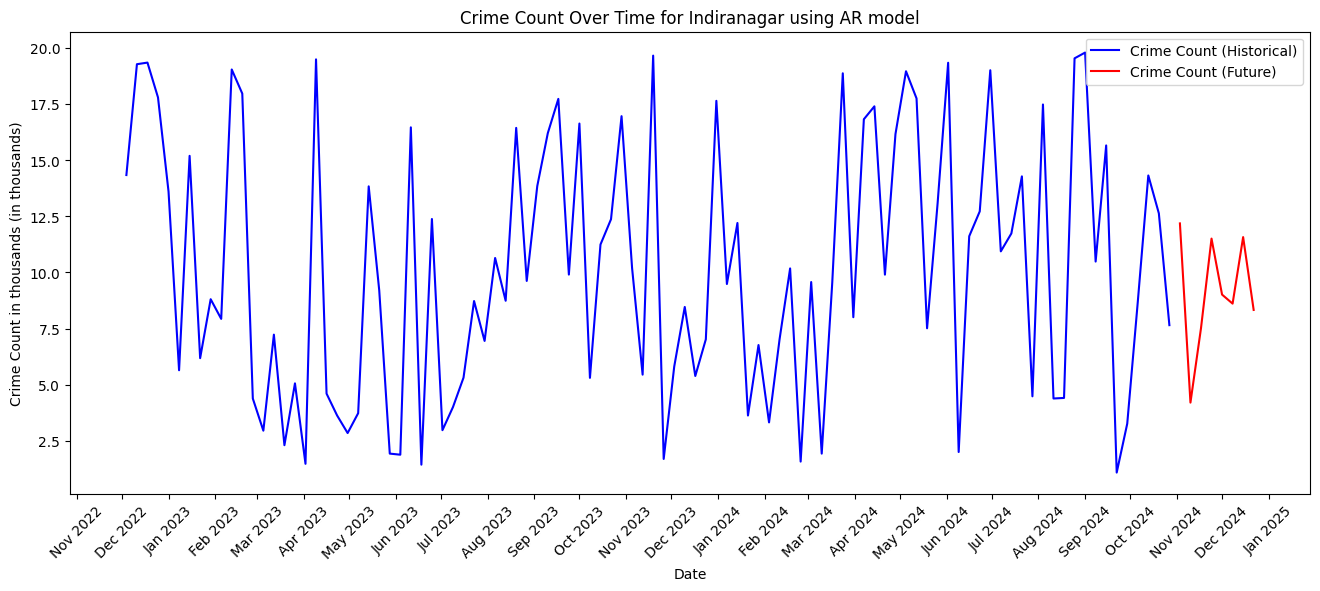

In [12]:
plot_crime_count(df_I,ar_future_I,area='Indiranagar',model='AR')

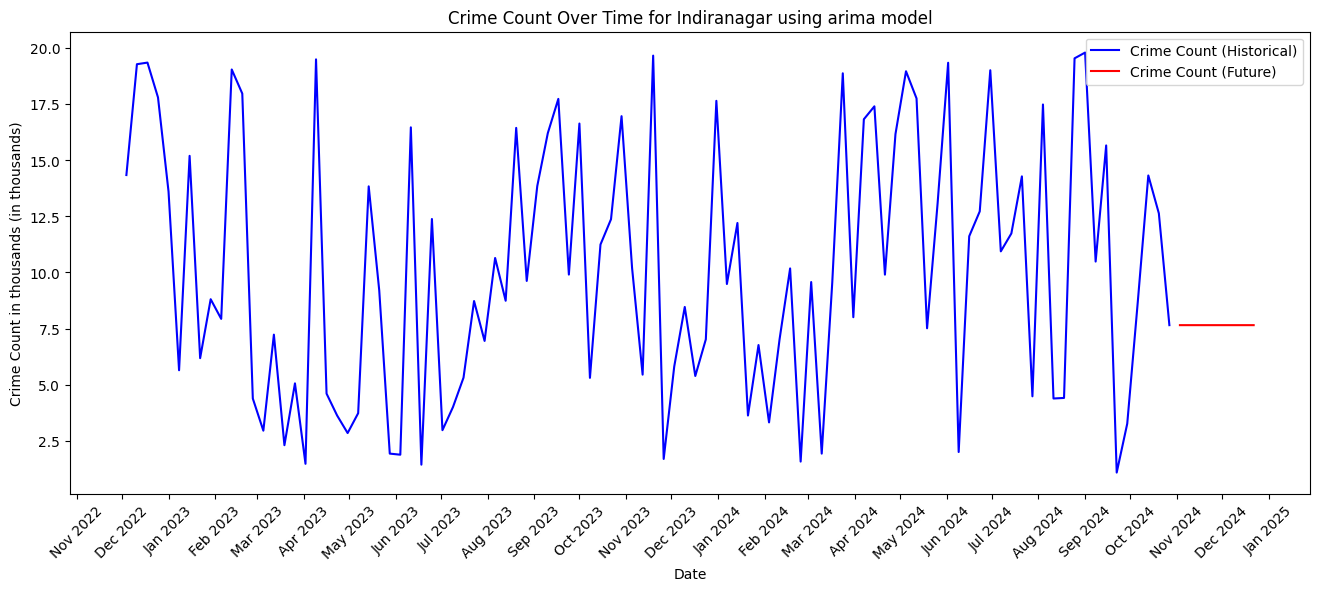

In [13]:
plot_crime_count(df_I,arima_future_I,area='Indiranagar',model='arima')

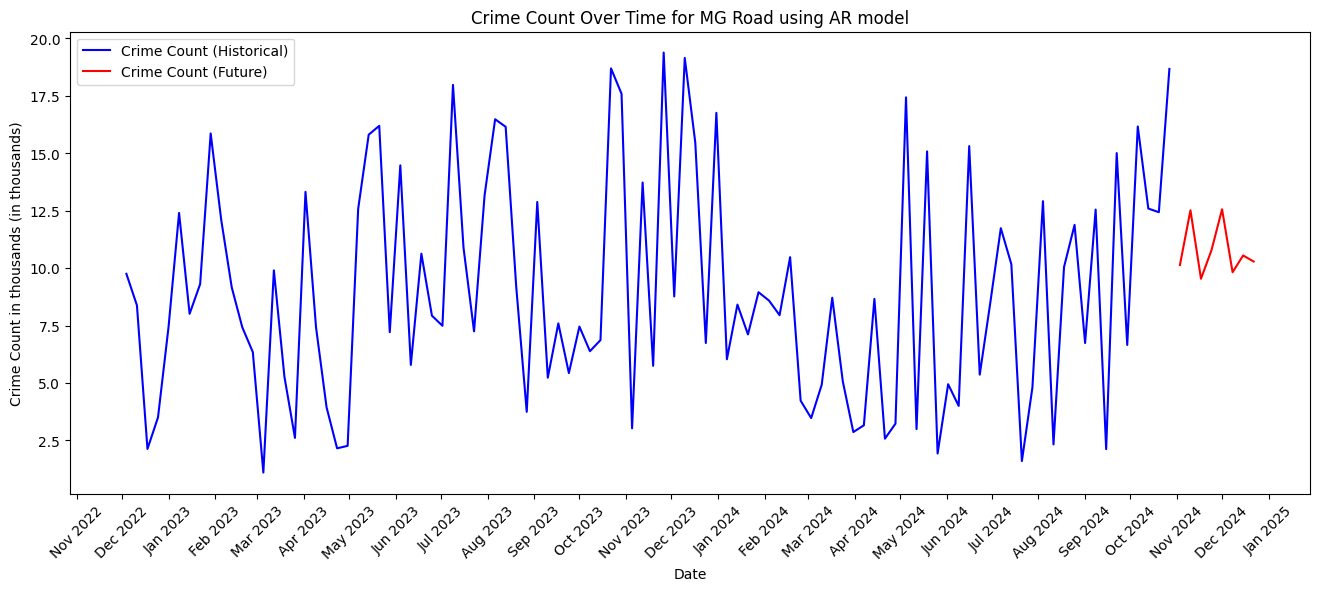

In [14]:
plot_crime_count(df_M,ar_future_M,area='MG Road',model='AR')

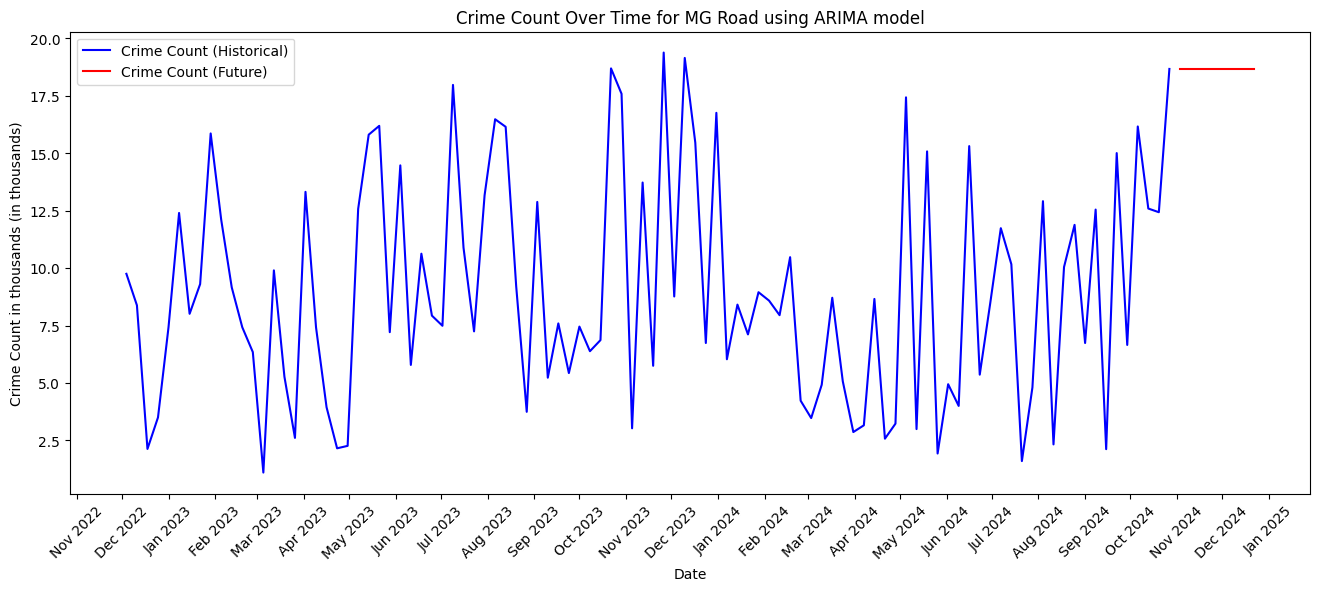

In [15]:
plot_crime_count(df_M,arima_future_M,area='MG Road',model='ARIMA')

# Question 2 Moving Average


## 1. Simple Moving Average

In [27]:
df = df_I
forecast_dates = pd.date_range(df.index[-1], periods=9, freq='W')[1:]
window_sma = 4
sma = df['Crime Count in thousands'].rolling(window=window_sma).mean()
sma_forecast = [sma.iloc[-1]] * 8

## 2. Autoregressive Moving Average

In [28]:
arma_model = ARIMA(df['Crime Count in thousands'], order=(1, 0, 1))
arma_fit = arma_model.fit()
arma_forecast = arma_fit.forecast(steps=8)

## 3. Exponential Moving Average

In [29]:
window_ema = 4
ema = df['Crime Count in thousands'].ewm(span=window_ema, adjust=False).mean()
ema_forecast = [ema.iloc[-1]] * 8

## 4. Weighted Moving Average

In [30]:
window_wma = 4
weights = np.arange(1, window_wma+1)
wma = df['Crime Count in thousands'].rolling(window=window_wma).apply(lambda x: np.dot(x, weights) / weights.sum(), raw=True)
wma_forecast = [wma.iloc[-1]] * 8

## 5. Hull Moving Average

In [31]:
window_hma = 4
half_length = window_hma // 2
sqrt_length = int(window_hma**0.5)
wma_half = df['Crime Count in thousands'].rolling(window=half_length).mean()
wma_full = df['Crime Count in thousands'].rolling(window=window_hma).mean()
hma = (wma_half - wma_full).rolling(window=sqrt_length).mean()
hma_forecast = [hma.iloc[-1]] * 8

## 6. Moving Average Crossover

In [32]:
window_crossover_short = 4
window_crossover_long = 10
short_sma = df['Crime Count in thousands'].rolling(window=window_crossover_short).mean()
long_sma = df['Crime Count in thousands'].rolling(window=window_crossover_long).mean()
crossover = short_sma > long_sma
crossover_forecast = [(short_sma.iloc[-1] + long_sma.iloc[-1]) / 2] * 8

## Plotting the Results

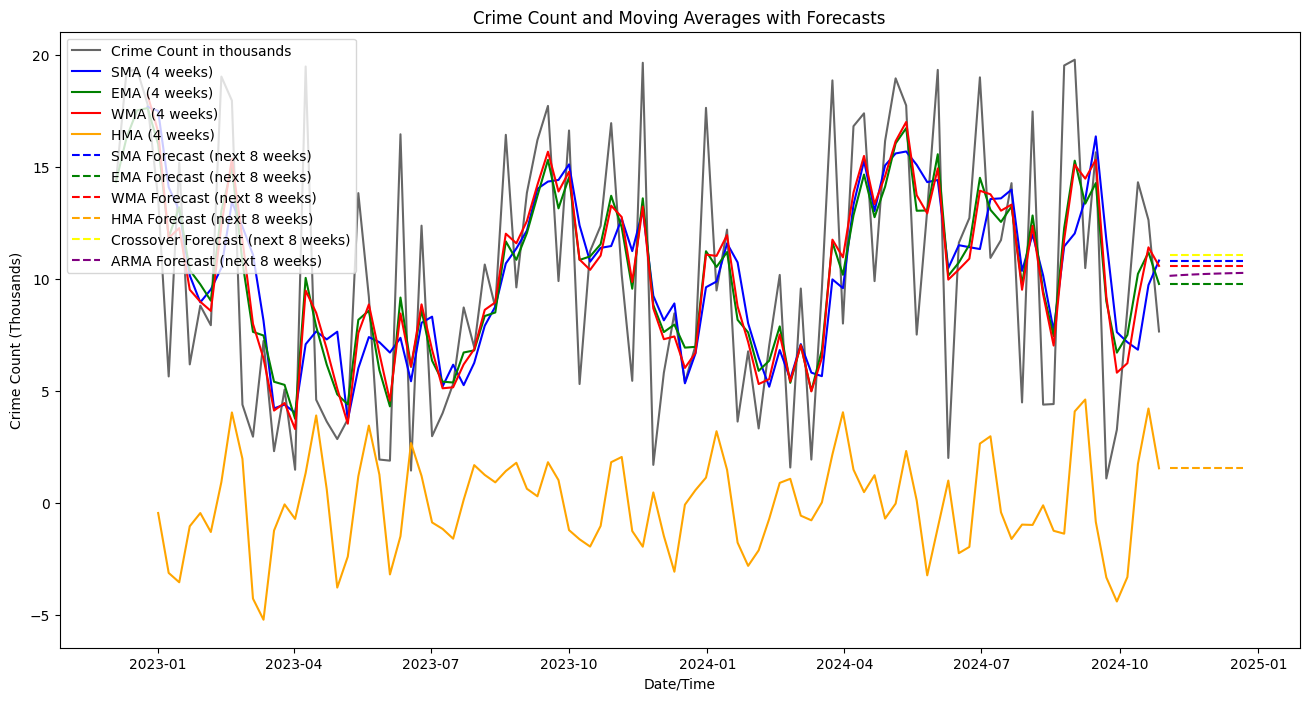

In [33]:
plt.figure(figsize=(16, 8))
plt.plot(df['Crime Count in thousands'], label='Crime Count in thousands', color='black', alpha=0.6)
plt.plot(sma, label='SMA (4 weeks)', color='blue')
plt.plot(ema, label='EMA (4 weeks)', color='green')
plt.plot(wma, label='WMA (4 weeks)', color='red')
plt.plot(hma, label='HMA (4 weeks)', color='orange')
plt.plot(forecast_dates, sma_forecast, label='SMA Forecast (next 8 weeks)', color='blue', linestyle='--')
plt.plot(forecast_dates, ema_forecast, label='EMA Forecast (next 8 weeks)', color='green', linestyle='--')
plt.plot(forecast_dates, wma_forecast, label='WMA Forecast (next 8 weeks)', color='red', linestyle='--')
plt.plot(forecast_dates, hma_forecast, label='HMA Forecast (next 8 weeks)', color='orange', linestyle='--')
plt.plot(forecast_dates, crossover_forecast, label='Crossover Forecast (next 8 weeks)', color='yellow', linestyle='--')
plt.plot(forecast_dates, arma_forecast, label='ARMA Forecast (next 8 weeks)', color='purple', linestyle='--')
plt.title('Crime Count and Moving Averages with Forecasts')
plt.xlabel('Date/Time')
plt.ylabel('Crime Count (Thousands)')
plt.legend(loc='upper left')
plt.show()
forecast_results = pd.DataFrame({
    'SMA Forecast': sma_forecast,
    'EMA Forecast': ema_forecast,
    'WMA Forecast': wma_forecast,
    'HMA Forecast': hma_forecast,
    'Crossover Forecast': crossover_forecast,
    'ARMA Forecast': arma_forecast
}, index=forecast_dates)